In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import soundfile as sf
from IPython.display import Audio, display

346.91


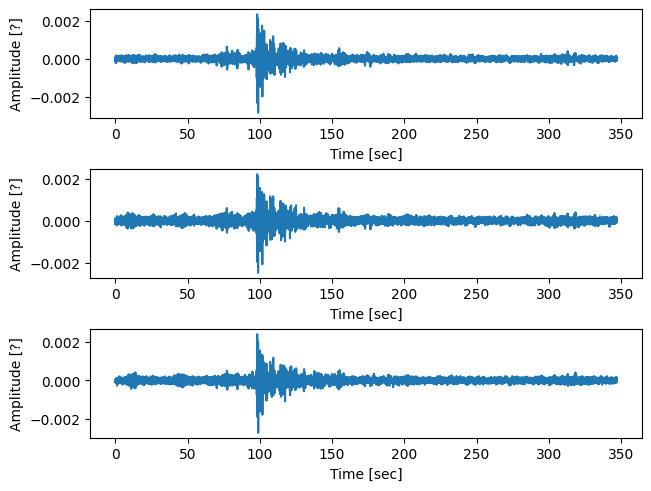

In [85]:
# y is time series sound data
Y, sample_rate = sf.read('data/sample_1.wav')

# Transpose Y to improve indexing
Y = Y.T

# Compute sample interval
sample_interval = 1 / sample_rate

# Compute duration of Y
Y_duration = Y[0].size * sample_interval

# Helper function for plotting channel waveforms
def plot_waveforms(Y):
    # Generate sampling time series from sample rate
    x = np.arange(0, Y[0].size) * sample_interval

    # Plot channel waveforms
    fig, axs = plt.subplots(3, 1, layout='constrained')
    axs[0].plot(x, Y[0])
    axs[1].plot(x, Y[1])
    axs[2].plot(x, Y[2])

    for ax in axs:
        ax.set_xlabel('Time [sec]')
        ax.set_ylabel('Amplitude [?]')

    plt.show()

plot_waveforms(Y)

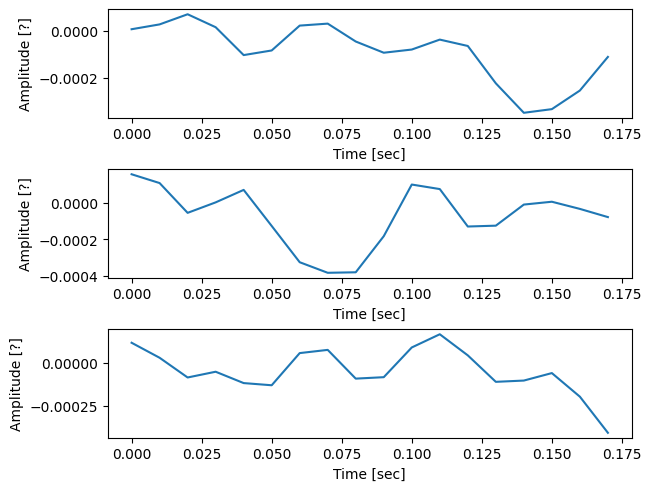

-70.0
10.0


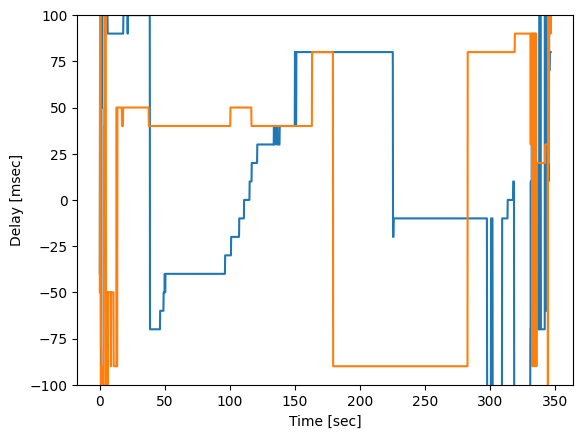

In [95]:
# Assume that channel 0 is our reference waveform recorded by microphone 0
# Define the physical distance between microphone 0 and microphones 2 and 3
# We will assume this distance is uniform

# Distance between microphones (meters)
mic_distance = 100 / 3.28084 # 100 feet in meters

# Speed of sound in dry air at 20 C (meters/second)
c = 343

# Maximum delay between microphones when receiving a sound from the same source
max_delay = mic_distance / c

# Helper function for getting segments of a waveform
def get_segment(Y, start, duration):
    start_index = round(start * sample_rate)
    end_index = start_index + round(duration * sample_rate)
    return Y[:,start_index:end_index]

# We will use the maximum microphone delay as the width of a sliding window
start = 70
window_size = max_delay * 2
Y_window = get_segment(Y, start, window_size)

plot_waveforms(Y_window)

def delay_from_reference(reference, other):
    correlation = scipy.signal.correlate(other, reference, mode="full")
    lags = scipy.signal.correlation_lags(other.size, reference.size, mode="full")
    lag = lags[np.argmax(correlation)]
    return lag * sample_interval


print(delay_from_reference(Y_window[0], Y_window[1]) * 1000)
print(delay_from_reference(Y_window[0], Y_window[2]) * 1000)

delays_to_1 = []
delays_to_2 = []
window_starts = []
for n in range(0, int(Y_duration / window_size)):
    Y_window = get_segment(Y, n * window_size, (n + 1) * window_size)
    delays_to_1.append(delay_from_reference(Y_window[0], Y_window[1]))
    delays_to_2.append(delay_from_reference(Y_window[0], Y_window[2]))
    window_starts.append(n * window_size)
delays_to_1 = np.asarray(delays_to_1) * 1000
delays_to_2 = np.asarray(delays_to_2) * 1000
window_starts = np.asarray(window_starts)

fig, ax = plt.subplots()
ax.plot(window_starts, delays_to_1)
ax.plot(window_starts, delays_to_2)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Delay [msec]')
ax.set_ylim(-100, 100)

plt.show()

    
    


